In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Set plotting style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('C:/Users/Gerji/Desktop/projects/Credit Risk Model/Credit-Risk-Model/data/raw/data.csv')

In [12]:
# 1. Overview of the Data
print("--- Data Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  F

In [13]:
# 2. Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


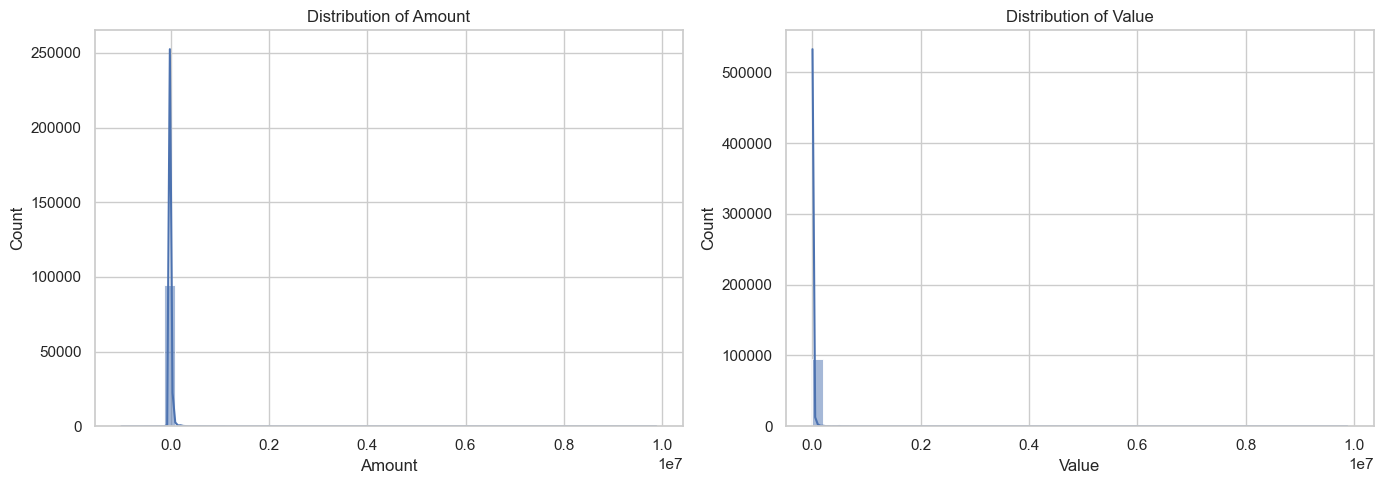

In [14]:
# 3. Distribution of Numerical Features (Amount and Value)
plt.figure(figsize=(14, 5))
numerical_cols = ['Amount', 'Value']
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distribution.png')

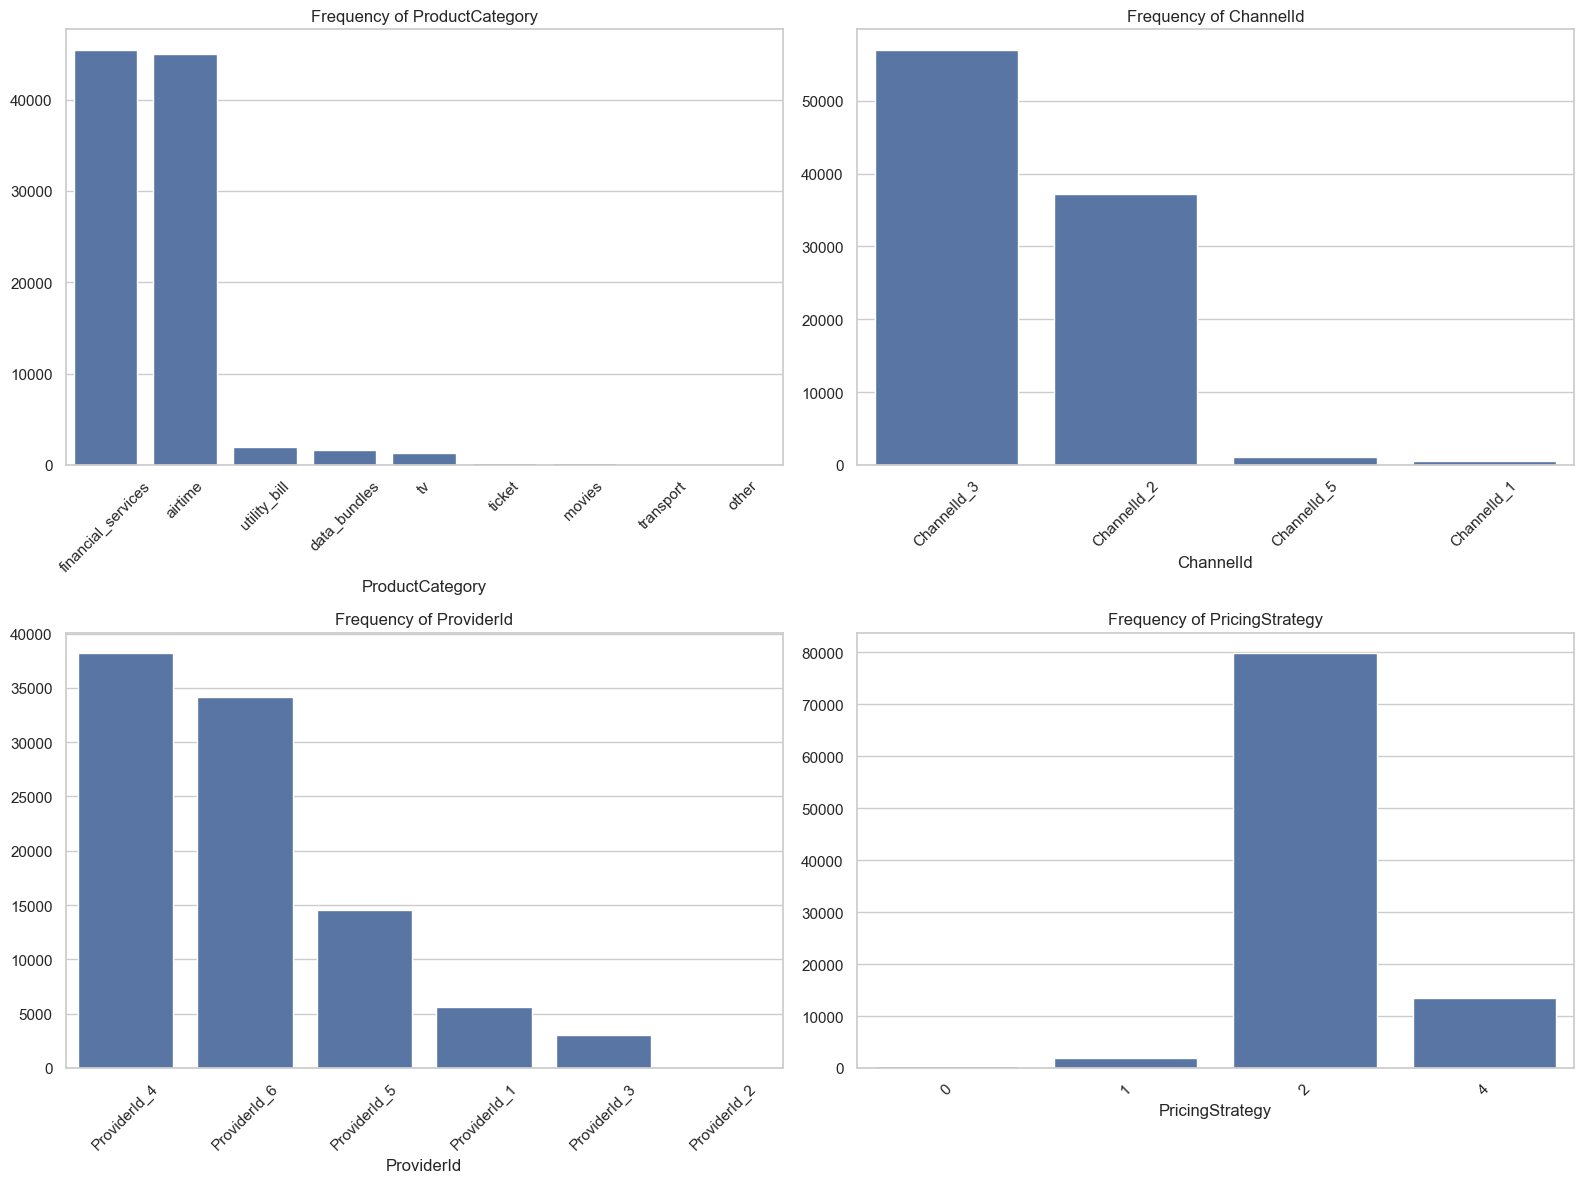

In [15]:
# 4. Distribution of Categorical Features
categorical_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    # Ensure bars are in sorted order as per general guidelines
    counts = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_distribution.png')

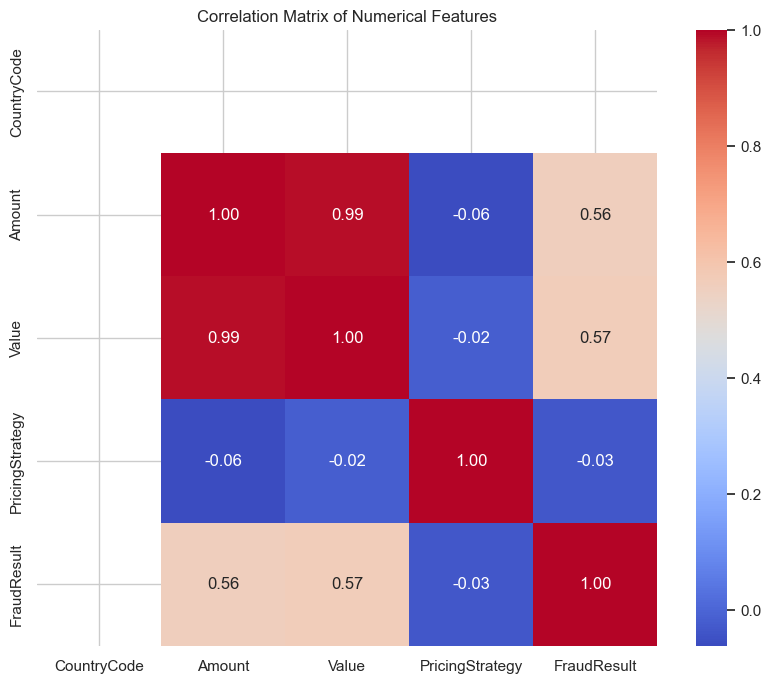

In [16]:
# 5. Correlation Analysis
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')

In [17]:
# 6. Identifying Missing Values
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing_values)


--- Missing Values ---
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


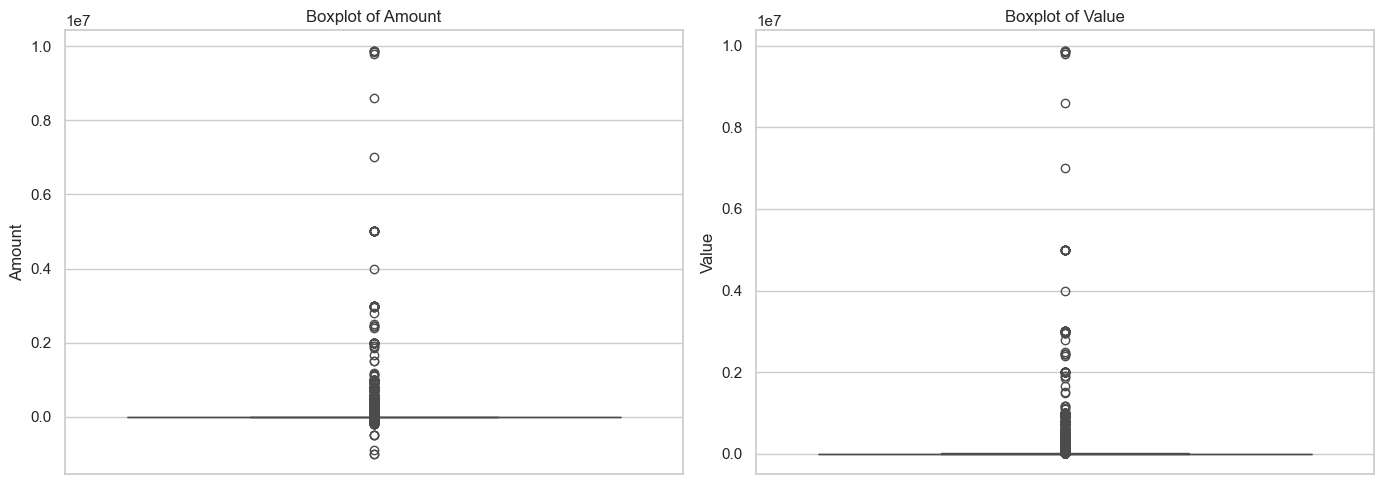

In [18]:
# 7. Outlier Detection using Box Plots
plt.figure(figsize=(14, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('outlier_detection.png')